## Importing Libraries

In [1]:
# For numeric calculations
import numpy as np
import pandas as pd

# For visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For balancing the dataset
from imblearn.over_sampling import SMOTE

# For machine learning models
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings

In [2]:
# Configurations
warnings.filterwarnings('ignore')

## Loading training and testing exoplanet data into Pandas DataFrame

In [3]:
# Importing training data
train_dataset_path = "./dataset/exoTrain.csv"
train_df = pd.read_csv(train_dataset_path)

# Importing test data
test_dataset_path = "./dataset/exoTest.csv"
test_df = pd.read_csv(test_dataset_path)

In [4]:
# Combining two dataframes for further investigation
df = pd.concat([train_df, test_df])
print(f'Dataset consists of {df.shape[0]} rows and {df.shape[1]} columns')

Dataset consists of 5657 rows and 3198 columns


### Let's change the labels from 1 -> 0 and 2 -> 1 to maintain consistency

In [5]:
categories = {1: 0, 2: 1}
try: 
    df.LABEL = [categories[item] for item in df.LABEL]
except KeyError:
    print(f"{KeyError} Keys does not match in LABEL column")

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LABEL,5657.0,0.007424,0.085852,0.00,0.00,0.00,0.00,1.0
FLUX.1,5657.0,181.877969,20781.963875,-227856.26,-39.84,-0.47,51.71,1439240.5
FLUX.2,5657.0,189.987960,21054.656517,-315440.76,-37.05,-0.76,46.15,1453319.0
FLUX.3,5657.0,185.974637,21157.448490,-284001.76,-35.73,-0.82,45.47,1468429.0
FLUX.4,5657.0,214.941396,21459.248650,-234006.87,-33.18,-0.42,42.50,1495750.0
...,...,...,...,...,...,...,...,...
FLUX.3193,5657.0,618.647262,50730.210299,-502889.37,-23.61,3.90,31.26,3616292.0
FLUX.3194,5657.0,-419.069604,17181.524637,-775322.00,-26.59,-1.25,18.14,288607.5
FLUX.3195,5657.0,-477.447287,17074.095510,-732006.00,-24.35,0.00,18.37,215972.0
FLUX.3196,5657.0,-373.229072,15723.359669,-700992.00,-22.55,0.24,18.88,207590.0


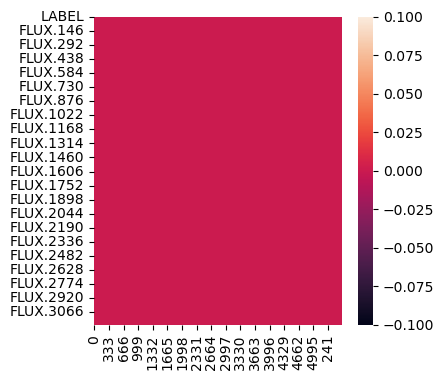

In [7]:
# Visulization #1 :- Heatmap for any null values
plt.figure(figsize = (4,4))

ax = plt.axes()
sns.heatmap(df.isnull().T, ax=ax)
plt.show()

From the heatmap we can see. There are no missing values in the data.

## Class distribution

In [8]:
df["LABEL"].value_counts()

print(f"From {len(df["LABEL"])} rows, there are {df["LABEL"].value_counts()[0]} non-exoplanets and {df["LABEL"].value_counts()[1]} confirmed exoplanets in the dataset")

From 5657 rows, there are 5615 non-exoplanets and 42 confirmed exoplanets in the dataset


#### The class distribution looks imbalanced. Let's explore it more through visualizations

Pie Chart Distribution

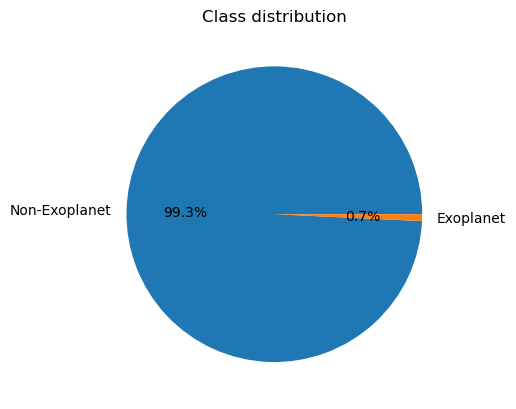

In [9]:
# Visulization #2 :- Plotting class distribution using pie chart
fig, ax = plt.subplots()

ax.pie(df["LABEL"].value_counts(), labels=["Non-Exoplanet", "Exoplanet"], autopct='%1.1f%%');
plt.title("Class distribution");
plt.show();

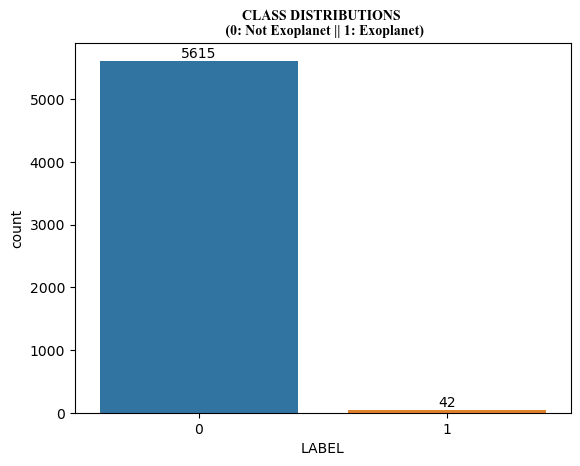

In [10]:
# Visulization #3 :- Number of Stars with Confirmed Exoplanets or Not
plt.title('CLASS DISTRIBUTIONS \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=20, font='times new roman', weight='bold', color='black')
ax = sns.countplot(data=df, x="LABEL")
ax.bar_label(ax.containers[0])
plt.show()

In [11]:
# Over sampling the imbalanced class
smote = SMOTE(sampling_strategy=1)
X_res, y_res = smote.fit_resample(X, y)

NameError: name 'X' is not defined

<Axes: ylabel='count'>

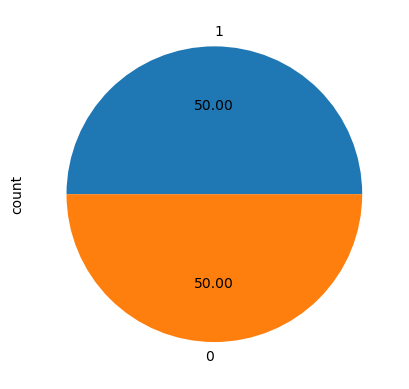

In [33]:
y_res.value_counts().plot.pie(autopct = "%.2f")

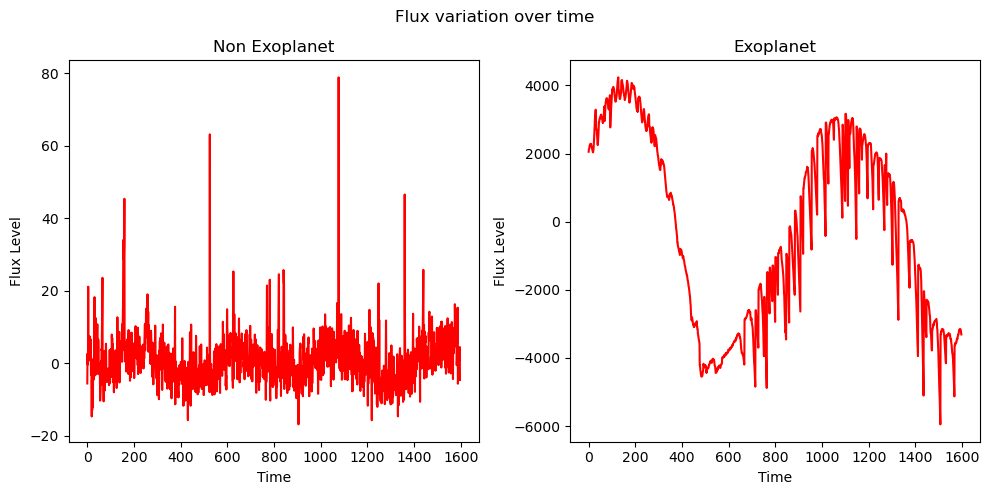

In [35]:
# Setting figure size
plt.figure(figsize=(10, 5))

# Non-exoplanet star light flux over time
row_index = 150 # Selecting random non-exoplanet row
fluxes_non_exo = df.iloc[row_index,1:(df.shape[1]//2)].values

plt.subplot(1, 2, 1)
plt.plot(fluxes_non_exo, color = "red")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Non Exoplanet")

# Exoplanet star light flux over time
row_index = 21 # Selecting random exoplanet row
fluxes_exo = df.iloc[row_index,1:(df.shape[1]//2)].values

plt.subplot(1, 2, 2)
plt.plot(fluxes_exo, color = "red")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Exoplanet")

plt.tight_layout()
plt.suptitle('Flux variation over time') 
plt.subplots_adjust(top=0.88)
plt.show()

## Creating Training and Testing Sets

In [9]:
# Splitting data into X, y variables
X = df.drop(["LABEL"], axis=1)
y = df["LABEL"]

# X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4525, 3197), (1132, 3197), (4525,), (1132,))

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

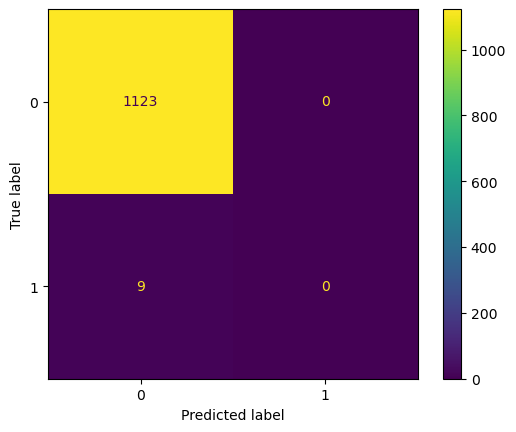

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_preds = model.predict(X_test)

cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()